In [69]:
import soccerdata as sd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, label_binarize

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# Plotting tree
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

# Metrics
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, average_precision_score

pd.options.display.max_rows = 4000

# Big 5 European Leagues Combined, 2021-2022 and 2022-2023 seasons

In [3]:
fbref = sd.FBref(leagues="Big 5 European Leagues Combined", seasons=["2021-22", "2022-23"])

[08/28/24 09:04:47] INFO     Saving cached data to C:\Users\pat20\soccerdata\data\FBref               ]8;id=312070;file://C:\Users\pat20\anaconda3\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=276983;file://C:\Users\pat20\anaconda3\lib\site-packages\soccerdata\_common.py#92\92]8;;\

### Goalkeeper statistics

In [4]:
keeper = fbref.read_team_match_stats(stat_type='keeper')
keeper.head()

date  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés 2021-11-30   
                      2021-12-14 Linares Dep-Alavés              2021-12-14   
              Angers  2021-12-19 Linas-Montl.-Angers             2021-12-19   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia          2021-08-07   
                      2021-08-14 Arminia-Freiburg                2021-08-14   

                                                                         round  \
                                                                                 
league season team    game                                                       
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés   First round   
                      2021-12-14 Linares Dep-Alavés               Second round   
              Angers  2021-12-19 Linas-Montl.-Angers               Round of 64   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia            Round of 64   
                      2021-08-14 Arminia-Freiburg                  Matchweek 1   

                                                                  day venue  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Tue  Away   
                      2021-12-14 Linares Dep-Alavés               Tue  Away   
              Angers  2021-12-19 Linas-Montl.-Angers              Sun  Away   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia           Sat  Away   
                      2021-08-14 Arminia-Freiburg                 Sat  Home   

                                                                 result GF GA  \
                                                                                
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés      W  3  0   
                      2021-12-14 Linares Dep-Alavés                   L  1  2   
              Angers  2021-12-19 Linas-Montl.-Angers                  L  0  2   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia               W  6  3   
                      2021-08-14 Arminia-Freiburg                     D  0  0   

                                                                                  opponent  \
                                                                                             
league season team    game                                                                   
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Unami Club Polideportivo   
                      2021-12-14 Linares Dep-Alavés                            Linares Dep   
              Angers  2021-12-19 Linas-Montl.-Angers                          Linas-Montl.   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                     SpVgg Bayreuth   
                      2021-08-14 Arminia-Freiburg                                 Freiburg   

                                                                 Performance  \
                                                                        SoTA   
league season team    game                                                     
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés           0   
                      2021-12-14 Linares Dep-Alavés                        9   
              Angers  2021-12-19 Linas-Montl.-Angers                       0   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                    4   
                      2021-08-14 Arminia-Freiburg                          5   

                                                                     ...  \
                             

### Shooting statistics

In [5]:
shooting = fbref.read_team_match_stats(stat_type='shooting')
shooting.head()

date  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés 2021-11-30   
                      2021-12-14 Linares Dep-Alavés              2021-12-14   
              Angers  2021-12-19 Linas-Montl.-Angers             2021-12-19   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia          2021-08-07   
                      2021-08-14 Arminia-Freiburg                2021-08-14   

                                                                         round  \
                                                                                 
league season team    game                                                       
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés   First round   
                      2021-12-14 Linares Dep-Alavés               Second round   
              Angers  2021-12-19 Linas-Montl.-Angers               Round of 64   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia            Round of 64   
                      2021-08-14 Arminia-Freiburg                  Matchweek 1   

                                                                  day venue  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Tue  Away   
                      2021-12-14 Linares Dep-Alavés               Tue  Away   
              Angers  2021-12-19 Linas-Montl.-Angers              Sun  Away   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia           Sat  Away   
                      2021-08-14 Arminia-Freiburg                 Sat  Home   

                                                                 result GF GA  \
                                                                                
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés      W  3  0   
                      2021-12-14 Linares Dep-Alavés                   L  1  2   
              Angers  2021-12-19 Linas-Montl.-Angers                  L  0  2   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia               W  6  3   
                      2021-08-14 Arminia-Freiburg                     D  0  0   

                                                                                  opponent  \
                                                                                             
league season team    game                                                                   
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Unami Club Polideportivo   
                      2021-12-14 Linares Dep-Alavés                            Linares Dep   
              Angers  2021-12-19 Linas-Montl.-Angers                          Linas-Montl.   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                     SpVgg Bayreuth   
                      2021-08-14 Arminia-Freiburg                                 Freiburg   

                                                                 Standard      \
                                                                      Gls  Sh   
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés        3  15   
                      2021-12-14 Linares Dep-Alavés                     1  14   
              Angers  2021-12-19 Linas-Montl.-Angers                    0   0   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                 6  27   
                      2021-08-14 Arminia-Freiburg                       0  10   

                                                                  ...        \
                  

### Passing statistics

In [6]:
passing = fbref.read_team_match_stats(stat_type='passing')
passing.head()

date  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés 2021-11-30   
                      2021-12-14 Linares Dep-Alavés              2021-12-14   
              Angers  2021-12-19 Linas-Montl.-Angers             2021-12-19   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia          2021-08-07   
                      2021-08-14 Arminia-Freiburg                2021-08-14   

                                                                         round  \
                                                                                 
league season team    game                                                       
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés   First round   
                      2021-12-14 Linares Dep-Alavés               Second round   
              Angers  2021-12-19 Linas-Montl.-Angers               Round of 64   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia            Round of 64   
                      2021-08-14 Arminia-Freiburg                  Matchweek 1   

                                                                  day venue  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Tue  Away   
                      2021-12-14 Linares Dep-Alavés               Tue  Away   
              Angers  2021-12-19 Linas-Montl.-Angers              Sun  Away   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia           Sat  Away   
                      2021-08-14 Arminia-Freiburg                 Sat  Home   

                                                                 result GF GA  \
                                                                                
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés      W  3  0   
                      2021-12-14 Linares Dep-Alavés                   L  1  2   
              Angers  2021-12-19 Linas-Montl.-Angers                  L  0  2   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia               W  6  3   
                      2021-08-14 Arminia-Freiburg                     D  0  0   

                                                                                  opponent  \
                                                                                             
league season team    game                                                                   
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Unami Club Polideportivo   
                      2021-12-14 Linares Dep-Alavés                            Linares Dep   
              Angers  2021-12-19 Linas-Montl.-Angers                          Linas-Montl.   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                     SpVgg Bayreuth   
                      2021-08-14 Arminia-Freiburg                                 Freiburg   

                                                                 Total        \
                                                                   Cmp   Att   
league season team    game                                                     
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  <NA>  <NA>   
                      2021-12-14 Linares Dep-Alavés               <NA>  <NA>   
              Angers  2021-12-19 Linas-Montl.-Angers              <NA>  <NA>   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia           <NA>  <NA>   
                      2021-08-14 Arminia-Freiburg                  250   381   

                                                                  ... Ast  \
                            

### Passing types statistics

In [7]:
passing_types = fbref.read_team_match_stats(stat_type='passing_types')
passing_types.head()

date  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés 2021-11-30   
                      2021-12-14 Linares Dep-Alavés              2021-12-14   
              Angers  2021-12-19 Linas-Montl.-Angers             2021-12-19   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia          2021-08-07   
                      2021-08-14 Arminia-Freiburg                2021-08-14   

                                                                         round  \
                                                                                 
league season team    game                                                       
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés   First round   
                      2021-12-14 Linares Dep-Alavés               Second round   
              Angers  2021-12-19 Linas-Montl.-Angers               Round of 64   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia            Round of 64   
                      2021-08-14 Arminia-Freiburg                  Matchweek 1   

                                                                  day venue  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Tue  Away   
                      2021-12-14 Linares Dep-Alavés               Tue  Away   
              Angers  2021-12-19 Linas-Montl.-Angers              Sun  Away   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia           Sat  Away   
                      2021-08-14 Arminia-Freiburg                 Sat  Home   

                                                                 result GF GA  \
                                                                                
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés      W  3  0   
                      2021-12-14 Linares Dep-Alavés                   L  1  2   
              Angers  2021-12-19 Linas-Montl.-Angers                  L  0  2   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia               W  6  3   
                      2021-08-14 Arminia-Freiburg                     D  0  0   

                                                                                  opponent  \
                                                                                             
league season team    game                                                                   
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Unami Club Polideportivo   
                      2021-12-14 Linares Dep-Alavés                            Linares Dep   
              Angers  2021-12-19 Linas-Montl.-Angers                          Linas-Montl.   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                     SpVgg Bayreuth   
                      2021-08-14 Arminia-Freiburg                                 Freiburg   

                                                                   Att  \
                                                                         
league season team    game                                               
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  <NA>   
                      2021-12-14 Linares Dep-Alavés               <NA>   
              Angers  2021-12-19 Linas-Montl.-Angers              <NA>   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia           <NA>   
                      2021-08-14 Arminia-Freiburg                  381   

                                                                 Pass Types  \
                                                                       Liv

### Goal and shot creation statistics

In [8]:
goal_shot_creation = fbref.read_team_match_stats(stat_type='goal_shot_creation')
goal_shot_creation.head()

date  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés 2021-11-30   
                      2021-12-14 Linares Dep-Alavés              2021-12-14   
              Angers  2021-12-19 Linas-Montl.-Angers             2021-12-19   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia          2021-08-07   
                      2021-08-14 Arminia-Freiburg                2021-08-14   

                                                                         round  \
                                                                                 
league season team    game                                                       
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés   First round   
                      2021-12-14 Linares Dep-Alavés               Second round   
              Angers  2021-12-19 Linas-Montl.-Angers               Round of 64   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia            Round of 64   
                      2021-08-14 Arminia-Freiburg                  Matchweek 1   

                                                                  day venue  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Tue  Away   
                      2021-12-14 Linares Dep-Alavés               Tue  Away   
              Angers  2021-12-19 Linas-Montl.-Angers              Sun  Away   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia           Sat  Away   
                      2021-08-14 Arminia-Freiburg                 Sat  Home   

                                                                 result GF GA  \
                                                                                
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés      W  3  0   
                      2021-12-14 Linares Dep-Alavés                   L  1  2   
              Angers  2021-12-19 Linas-Montl.-Angers                  L  0  2   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia               W  6  3   
                      2021-08-14 Arminia-Freiburg                     D  0  0   

                                                                                  opponent  \
                                                                                             
league season team    game                                                                   
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Unami Club Polideportivo   
                      2021-12-14 Linares Dep-Alavés                            Linares Dep   
              Angers  2021-12-19 Linas-Montl.-Angers                          Linas-Montl.   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                     SpVgg Bayreuth   
                      2021-08-14 Arminia-Freiburg                                 Freiburg   

                                                                 SCA Types  \
                                                                       SCA   
league season team    game                                                   
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés      <NA>   
                      2021-12-14 Linares Dep-Alavés                   <NA>   
              Angers  2021-12-19 Linas-Montl.-Angers                  <NA>   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia               <NA>   
                      2021-08-14 Arminia-Freiburg                       15   

                                                                           \
                                            

### Defensive statistics

In [9]:
defense = fbref.read_team_match_stats(stat_type='defense')
defense.head()

date  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés 2021-11-30   
                      2021-12-14 Linares Dep-Alavés              2021-12-14   
              Angers  2021-12-19 Linas-Montl.-Angers             2021-12-19   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia          2021-08-07   
                      2021-08-14 Arminia-Freiburg                2021-08-14   

                                                                         round  \
                                                                                 
league season team    game                                                       
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés   First round   
                      2021-12-14 Linares Dep-Alavés               Second round   
              Angers  2021-12-19 Linas-Montl.-Angers               Round of 64   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia            Round of 64   
                      2021-08-14 Arminia-Freiburg                  Matchweek 1   

                                                                  day venue  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Tue  Away   
                      2021-12-14 Linares Dep-Alavés               Tue  Away   
              Angers  2021-12-19 Linas-Montl.-Angers              Sun  Away   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia           Sat  Away   
                      2021-08-14 Arminia-Freiburg                 Sat  Home   

                                                                 result GF GA  \
                                                                                
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés      W  3  0   
                      2021-12-14 Linares Dep-Alavés                   L  1  2   
              Angers  2021-12-19 Linas-Montl.-Angers                  L  0  2   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia               W  6  3   
                      2021-08-14 Arminia-Freiburg                     D  0  0   

                                                                                  opponent  \
                                                                                             
league season team    game                                                                   
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Unami Club Polideportivo   
                      2021-12-14 Linares Dep-Alavés                            Linares Dep   
              Angers  2021-12-19 Linas-Montl.-Angers                          Linas-Montl.   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                     SpVgg Bayreuth   
                      2021-08-14 Arminia-Freiburg                                 Freiburg   

                                                                 Tackles       \
                                                                     Tkl TklW   
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés    <NA>    9   
                      2021-12-14 Linares Dep-Alavés                 <NA>   11   
              Angers  2021-12-19 Linas-Montl.-Angers                <NA>    0   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia             <NA>    7   
                      2021-08-14 Arminia-Freiburg                     18    8   

                                                                  ...  \
                        

### Possession statistics

In [10]:
possession = fbref.read_team_match_stats(stat_type='possession')
possession.head()

date  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés 2021-11-30   
                      2021-12-14 Linares Dep-Alavés              2021-12-14   
              Angers  2021-12-19 Linas-Montl.-Angers             2021-12-19   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia          2021-08-07   
                      2021-08-14 Arminia-Freiburg                2021-08-14   

                                                                         round  \
                                                                                 
league season team    game                                                       
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés   First round   
                      2021-12-14 Linares Dep-Alavés               Second round   
              Angers  2021-12-19 Linas-Montl.-Angers               Round of 64   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia            Round of 64   
                      2021-08-14 Arminia-Freiburg                  Matchweek 1   

                                                                  day venue  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Tue  Away   
                      2021-12-14 Linares Dep-Alavés               Tue  Away   
              Angers  2021-12-19 Linas-Montl.-Angers              Sun  Away   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia           Sat  Away   
                      2021-08-14 Arminia-Freiburg                 Sat  Home   

                                                                 result GF GA  \
                                                                                
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés      W  3  0   
                      2021-12-14 Linares Dep-Alavés                   L  1  2   
              Angers  2021-12-19 Linas-Montl.-Angers                  L  0  2   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia               W  6  3   
                      2021-08-14 Arminia-Freiburg                     D  0  0   

                                                                                  opponent  \
                                                                                             
league season team    game                                                                   
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Unami Club Polideportivo   
                      2021-12-14 Linares Dep-Alavés                            Linares Dep   
              Angers  2021-12-19 Linas-Montl.-Angers                          Linas-Montl.   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                     SpVgg Bayreuth   
                      2021-08-14 Arminia-Freiburg                                 Freiburg   

                                                                  Poss  \
                                                                         
league season team    game                                               
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés    72   
                      2021-12-14 Linares Dep-Alavés                 58   
              Angers  2021-12-19 Linas-Montl.-Angers              <NA>   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia             54   
                      2021-08-14 Arminia-Freiburg                   45   

                                                                 Touches  ...  \
                                                                 Touches

### Miscellaneous statistics

In [11]:
misc = fbref.read_team_match_stats(stat_type='misc')
misc.head()

date  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés 2021-11-30   
                      2021-12-14 Linares Dep-Alavés              2021-12-14   
              Angers  2021-12-19 Linas-Montl.-Angers             2021-12-19   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia          2021-08-07   
                      2021-08-14 Arminia-Freiburg                2021-08-14   

                                                                         round  \
                                                                                 
league season team    game                                                       
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés   First round   
                      2021-12-14 Linares Dep-Alavés               Second round   
              Angers  2021-12-19 Linas-Montl.-Angers               Round of 64   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia            Round of 64   
                      2021-08-14 Arminia-Freiburg                  Matchweek 1   

                                                                  day venue  \
                                                                              
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Tue  Away   
                      2021-12-14 Linares Dep-Alavés               Tue  Away   
              Angers  2021-12-19 Linas-Montl.-Angers              Sun  Away   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia           Sat  Away   
                      2021-08-14 Arminia-Freiburg                 Sat  Home   

                                                                 result GF GA  \
                                                                                
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés      W  3  0   
                      2021-12-14 Linares Dep-Alavés                   L  1  2   
              Angers  2021-12-19 Linas-Montl.-Angers                  L  0  2   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia               W  6  3   
                      2021-08-14 Arminia-Freiburg                     D  0  0   

                                                                                  opponent  \
                                                                                             
league season team    game                                                                   
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Unami Club Polideportivo   
                      2021-12-14 Linares Dep-Alavés                            Linares Dep   
              Angers  2021-12-19 Linas-Montl.-Angers                          Linas-Montl.   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                     SpVgg Bayreuth   
                      2021-08-14 Arminia-Freiburg                                 Freiburg   

                                                                 Performance  \
                                                                        CrdY   
league season team    game                                                     
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés           2   
                      2021-12-14 Linares Dep-Alavés                        2   
              Angers  2021-12-19 Linas-Montl.-Angers                       1   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                    3   
                      2021-08-14 Arminia-Freiburg                          3   

                                                                       ...  \
                           

In [12]:
# Flattening dataframes
keeper.columns = [' '.join(col).strip() for col in keeper.columns.values]
shooting.columns = [' '.join(col).strip() for col in shooting.columns.values]
passing.columns = [' '.join(col).strip() for col in passing.columns.values]
passing_types.columns = [' '.join(col).strip() for col in passing_types.columns.values]
goal_shot_creation.columns = [' '.join(col).strip() for col in goal_shot_creation.columns.values]
defense.columns = [' '.join(col).strip() for col in defense.columns.values]
possession.columns = [' '.join(col).strip() for col in possession.columns.values]
misc.columns = [' '.join(col).strip() for col in misc.columns.values]

In [13]:
# Saving csv
keeper.to_csv('./data/keeper.csv')
shooting.to_csv('./data/shooting.csv')
passing.to_csv('./data/passing.csv')
passing_types.to_csv('./data/passing_types.csv')
goal_shot_creation.to_csv('./data/goal-shot.csv')
defense.to_csv('./data/defense.csv')
possession.to_csv('./data/possession.csv')
misc.to_csv('./data/misc.csv')

In [14]:
# Defining the primary merge keys
merge_keys = ['league', 'season', 'team', 'date', 'game']

# Dropping additional common columns from all but one DataFrame
goal_shot_creation = goal_shot_creation.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])
keeper = keeper.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])
misc = misc.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])
passing = passing.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])
passing_types = passing_types.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])
possession = possession.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])
shooting = shooting.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])

In [15]:
# Merging datasets on the primary keys
merged_df = pd.merge(defense, goal_shot_creation, on=merge_keys, suffixes=('', '_goal_shot_creation'))
merged_df = pd.merge(merged_df, keeper, on=merge_keys, suffixes=('', '_keeper'))
merged_df = pd.merge(merged_df, misc, on=merge_keys, suffixes=('', '_misc'))
merged_df = pd.merge(merged_df, passing, on=merge_keys, suffixes=('', '_passing'))
merged_df = pd.merge(merged_df, passing_types, on=merge_keys, suffixes=('', '_passing_types'))
merged_df = pd.merge(merged_df, possession, on=merge_keys, suffixes=('', '_possession'))
merged_df = pd.merge(merged_df, shooting, on=merge_keys, suffixes=('', '_shooting'))

In [16]:
# Displaying the first few rows of the merged DataFrame
merged_df.head()

date  \
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés 2021-11-30   
                      2021-12-14 Linares Dep-Alavés              2021-12-14   
              Angers  2021-12-19 Linas-Montl.-Angers             2021-12-19   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia          2021-08-07   
                      2021-08-14 Arminia-Freiburg                2021-08-14   

                                                                         round  \
league season team    game                                                       
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés   First round   
                      2021-12-14 Linares Dep-Alavés               Second round   
              Angers  2021-12-19 Linas-Montl.-Angers               Round of 64   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia            Round of 64   
                      2021-08-14 Arminia-Freiburg                  Matchweek 1   

                                                                  day venue  \
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Tue  Away   
                      2021-12-14 Linares Dep-Alavés               Tue  Away   
              Angers  2021-12-19 Linas-Montl.-Angers              Sun  Away   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia           Sat  Away   
                      2021-08-14 Arminia-Freiburg                 Sat  Home   

                                                                 result GF GA  \
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés      W  3  0   
                      2021-12-14 Linares Dep-Alavés                   L  1  2   
              Angers  2021-12-19 Linas-Montl.-Angers                  L  0  2   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia               W  6  3   
                      2021-08-14 Arminia-Freiburg                     D  0  0   

                                                                                  opponent  \
league season team    game                                                                   
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Unami Club Polideportivo   
                      2021-12-14 Linares Dep-Alavés                            Linares Dep   
              Angers  2021-12-19 Linas-Montl.-Angers                          Linas-Montl.   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                     SpVgg Bayreuth   
                      2021-08-14 Arminia-Freiburg                                 Freiburg   

                                                                  Tackles Tkl  \
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés         <NA>   
                      2021-12-14 Linares Dep-Alavés                      <NA>   
              Angers  2021-12-19 Linas-Montl.-Angers                     <NA>   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                  <NA>   
                      2021-08-14 Arminia-Freiburg                          18   

                                                                  Tackles TklW  \
league season team    game                                                       
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés             9   
                      2021-12-14 Linares Dep-Alavés                         11   
              Angers  2021-12-19 Linas-Montl.-Angers                         0   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                      7   
                      2021-08-14 Arminia-Freiburg                            8   

                  

In [17]:
merged_df.to_csv('./data/merged.csv')

In [18]:
merged_df.columns

Index(['date', 'round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent',
       'Tackles Tkl', 'Tackles TklW',
       ...
       'Standard FK', 'Standard PK', 'Standard PKatt', 'Expected xG',
       'Expected npxG', 'Expected npxG/Sh', 'Expected G-xG',
       'Expected np:G-xG', 'time_shooting', 'match_report_shooting'],
      dtype='object', length=171)

In [19]:
time_cols = [col for col in merged_df.columns if 'time' in col.lower()]
report_cols = [col for col in merged_df.columns if 'report' in col.lower()]

# Dropping 'time' and 'report' columns except one time column
merged_df.drop(columns=time_cols[1:] + report_cols, inplace=True)
merged_df.head()

date  \
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés 2021-11-30   
                      2021-12-14 Linares Dep-Alavés              2021-12-14   
              Angers  2021-12-19 Linas-Montl.-Angers             2021-12-19   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia          2021-08-07   
                      2021-08-14 Arminia-Freiburg                2021-08-14   

                                                                         round  \
league season team    game                                                       
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés   First round   
                      2021-12-14 Linares Dep-Alavés               Second round   
              Angers  2021-12-19 Linas-Montl.-Angers               Round of 64   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia            Round of 64   
                      2021-08-14 Arminia-Freiburg                  Matchweek 1   

                                                                  day venue  \
league season team    game                                                    
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Tue  Away   
                      2021-12-14 Linares Dep-Alavés               Tue  Away   
              Angers  2021-12-19 Linas-Montl.-Angers              Sun  Away   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia           Sat  Away   
                      2021-08-14 Arminia-Freiburg                 Sat  Home   

                                                                 result GF GA  \
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés      W  3  0   
                      2021-12-14 Linares Dep-Alavés                   L  1  2   
              Angers  2021-12-19 Linas-Montl.-Angers                  L  0  2   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia               W  6  3   
                      2021-08-14 Arminia-Freiburg                     D  0  0   

                                                                                  opponent  \
league season team    game                                                                   
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés  Unami Club Polideportivo   
                      2021-12-14 Linares Dep-Alavés                            Linares Dep   
              Angers  2021-12-19 Linas-Montl.-Angers                          Linas-Montl.   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                     SpVgg Bayreuth   
                      2021-08-14 Arminia-Freiburg                                 Freiburg   

                                                                  Tackles Tkl  \
league season team    game                                                      
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés         <NA>   
                      2021-12-14 Linares Dep-Alavés                      <NA>   
              Angers  2021-12-19 Linas-Montl.-Angers                     <NA>   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                  <NA>   
                      2021-08-14 Arminia-Freiburg                          18   

                                                                  Tackles TklW  \
league season team    game                                                       
<NA>   2122   Alavés  2021-11-30 Unami Club Polideportivo-Alavés             9   
                      2021-12-14 Linares Dep-Alavés                         11   
              Angers  2021-12-19 Linas-Montl.-Angers                         0   
              Arminia 2021-08-07 SpVgg Bayreuth-Arminia                      7   
                      2021-08-14 Arminia-Freiburg                            8   

                  

In [20]:
# Checking for missing values
merged_df.isnull().sum()

date                     0
round                    0
day                      0
venue                    0
result                   0
GF                       0
GA                       0
opponent                 0
Tackles Tkl            764
Tackles TklW            24
Tackles Def 3rd        764
Tackles Mid 3rd        764
Tackles Att 3rd        764
Challenges Tkl         764
Challenges Att         764
Challenges Tkl%        764
Challenges Lost        764
Blocks Blocks          764
Blocks Sh              764
Blocks Pass            764
Int                     24
Tkl+Int                  0
Clr                    764
Err                    764
time                     0
SCA Types SCA          764
SCA Types PassLive     764
SCA Types PassDead     764
SCA Types TO           764
SCA Types Sh           764
SCA Types Fld          764
SCA Types Def          764
GCA Types GCA          764
GCA Types PassLive     764
GCA Types PassDead     764
GCA Types TO           764
GCA Types Sh           764
G

In [21]:
# Checking for complete rows
complete_rows = merged_df.dropna()

# Counting and displaying complete rows
num_complete_rows = complete_rows.shape[0]
print(f"Number of complete rows: {num_complete_rows}")

Number of complete rows: 1683


In [22]:
lost_matches = len(complete_rows[complete_rows["result"] == "L"])
won_matches = len(complete_rows[complete_rows["result"] == "W"])
drawn_matches = len(complete_rows[complete_rows["result"] == "D"])

print(f"Number of lost matches: {lost_matches}")
print(f"Number of won matches: {won_matches}")
print(f"Number of drawn matches: {drawn_matches}")

Number of lost matches: 594
Number of won matches: 690
Number of drawn matches: 399


In [23]:
num_complete_rows / len(merged_df) * 100

63.22314049586777

In [24]:
complete_rows.to_csv('./data/complete.csv')
complete_rows.head()

date  \
league season team    game                                           
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg       2021-08-14   
                      2021-08-21 Greuther Fürth-Arminia 2021-08-21   
                      2021-08-28 Arminia-Eint Frankfurt 2021-08-28   
                      2021-09-12 M'Gladbach-Arminia     2021-09-12   
                      2021-09-18 Arminia-Hoffenheim     2021-09-18   

                                                               round  day  \
league season team    game                                                  
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg        Matchweek 1  Sat   
                      2021-08-21 Greuther Fürth-Arminia  Matchweek 2  Sat   
                      2021-08-28 Arminia-Eint Frankfurt  Matchweek 3  Sat   
                      2021-09-12 M'Gladbach-Arminia      Matchweek 4  Sun   
                      2021-09-18 Arminia-Hoffenheim      Matchweek 5  Sat   

                                                        venue result GF GA  \
league season team    game                                                   
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg        Home      D  0  0   
                      2021-08-21 Greuther Fürth-Arminia  Away      D  1  1   
                      2021-08-28 Arminia-Eint Frankfurt  Home      D  1  1   
                      2021-09-12 M'Gladbach-Arminia      Away      L  1  3   
                      2021-09-18 Arminia-Hoffenheim      Home      D  0  0   

                                                               opponent  \
league season team    game                                                
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg              Freiburg   
                      2021-08-21 Greuther Fürth-Arminia  Greuther Fürth   
                      2021-08-28 Arminia-Eint Frankfurt  Eint Frankfurt   
                      2021-09-12 M'Gladbach-Arminia          M'Gladbach   
                      2021-09-18 Arminia-Hoffenheim          Hoffenheim   

                                                         Tackles Tkl  \
league season team    game                                             
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                 18   
                      2021-08-21 Greuther Fürth-Arminia           18   
                      2021-08-28 Arminia-Eint Frankfurt            7   
                      2021-09-12 M'Gladbach-Arminia               12   
                      2021-09-18 Arminia-Hoffenheim                8   

                                                         Tackles TklW  ...  \
league season team    game                                             ...   
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                   8  ...   
                      2021-08-21 Greuther Fürth-Arminia            11  ...   
                      2021-08-28 Arminia-Eint Frankfurt             3  ...   
                      2021-09-12 M'Gladbach-Arminia                10  ...   
                      2021-09-18 Arminia-Hoffenheim                 2  ...   

                                                         Standard G/SoT  \
league season team    game                                                
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                   0.0   
                      2021-08-21 Greuther Fürth-Arminia             0.5   
                      2021-08-28 Arminia-Eint Frankfurt            0.25   
                      2021-09-12 M'Gladbach-Arminia                0.14   
                      2021-09-18 Arminia-Hoffenheim                 0.0   

                                                         Standard Dist  \
league season team    game                                               
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                 20.7   
                      2021-08-21 Greuther Fürth-Arminia           15.3   
                      2021-08-28 Arminia-Eint Frankfurt           21.3   
          

In [25]:
# Sorted column names
sorted_columns = sorted(complete_rows.columns.tolist())
sorted_columns

['1/3',
 'Aerial Duels Lost',
 'Aerial Duels Won',
 'Aerial Duels Won%',
 'Ast',
 'Att',
 'Blocks Blocks',
 'Blocks Pass',
 'Blocks Sh',
 'Carries 1/3',
 'Carries CPA',
 'Carries Carries',
 'Carries Dis',
 'Carries Mis',
 'Carries PrgC',
 'Carries PrgDist',
 'Carries TotDist',
 'Challenges Att',
 'Challenges Lost',
 'Challenges Tkl',
 'Challenges Tkl%',
 'Clr',
 'Corner Kicks In',
 'Corner Kicks Out',
 'Corner Kicks Str',
 'Crosses Opp',
 'Crosses Stp',
 'Crosses Stp%',
 'CrsPA',
 'Err',
 'Expected G-xG',
 'Expected np:G-xG',
 'Expected npxG',
 'Expected npxG/Sh',
 'Expected xG',
 'GA',
 'GCA Types Def',
 'GCA Types Fld',
 'GCA Types GCA',
 'GCA Types PassDead',
 'GCA Types PassLive',
 'GCA Types Sh',
 'GCA Types TO',
 'GF',
 'Goal Kicks Att',
 'Goal Kicks AvgLen',
 'Goal Kicks Launch%',
 'Int',
 'KP',
 'Launched Att',
 'Launched Cmp',
 'Launched Cmp%',
 'Long Att',
 'Long Cmp',
 'Long Cmp%',
 'Medium Att',
 'Medium Cmp',
 'Medium Cmp%',
 'Outcomes Blocks',
 'Outcomes Cmp',
 'Outcomes 

In [43]:
# Checking multicollinearity

complete_df = complete_rows

# List of variable pairs to calculate VIF
variable_pairs = [
    ('Challenges Tkl', 'Challenges Tkl%'),
    ('Crosses Stp', 'Crosses Stp%'),
    ('Launched Cmp', 'Launched Cmp%'),
    ('Long Cmp', 'Long Cmp%'),
    ('Medium Cmp', 'Medium Cmp%'),
    ('Short Cmp', 'Short Cmp%'),
    ('Standard SoT', 'Standard SoT%'),
    ('Take-Ons Succ', 'Take-Ons Succ%'),
    ('Take-Ons Tkld', 'Take-Ons Tkld%'),
    ('Total Cmp', 'Total Cmp%')
]

# Function to calculate VIF
def calculate_vif(df, features):
    X = df[features].dropna()
    X_scaled = StandardScaler().fit_transform(X)
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    return vif_data

# Calculating VIF for each pair of variables and storing the results
vif_results = []
for var1, var2 in variable_pairs:
    vif_data = calculate_vif(complete_df, [var1, var2])
    vif_results.append(vif_data)

# Concatenating all VIF results into a single DataFrame
vif_results_df = pd.concat(vif_results, ignore_index=True)

# Displaying the VIF results
vif_results_df

,feature,VIF
0,Challenges Tkl,1.307842
1,Challenges Tkl%,1.307842
2,Crosses Stp,2.106971
3,Crosses Stp%,2.106971
4,Launched Cmp,1.184868
5,Launched Cmp%,1.184868
6,Long Cmp,2.058615
7,Long Cmp%,2.058615
8,Medium Cmp,2.416992
9,Medium Cmp%,2.416992


In [26]:
# Removing unnecessary columns
redundant_columns = ["time", "round", "opponent", "date"]
redundant_columns += ['Performance GA', 'Outcomes Cmp', 'Att'] # Duplicates
redundant_columns += ["Standard G/Sh", 'Standard G/SoT', 'Standard Gls',
                      'Performance OG', 'GF', 'GA', 'Ast', 'GCA Types GCA',
                      'GCA Types PassLive', 'GCA Types PassDead', 'GCA Types Sh',
                      'GCA Types TO', 'GCA Types Def', 'GCA Types Fld',
                      'Expected G-xG', 'Expected np:G-xG'] # statistics related to goals
# redundant_columns += ['Standard PK', 'Standard PKatt', 'Penalty Kicks PKA', 'Penalty Kicks PKatt', 'Penalty Kicks PKm', 'Penalty Kicks PKsv'] # Penalty kicks statistics
complete_rows = complete_rows.drop(columns=redundant_columns)
complete_rows.to_csv('./data/complete.csv')
complete_rows.head()

day venue result  \
league season team    game                                                  
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg        Sat  Home      D   
                      2021-08-21 Greuther Fürth-Arminia  Sat  Away      D   
                      2021-08-28 Arminia-Eint Frankfurt  Sat  Home      D   
                      2021-09-12 M'Gladbach-Arminia      Sun  Away      L   
                      2021-09-18 Arminia-Hoffenheim      Sat  Home      D   

                                                         Tackles Tkl  \
league season team    game                                             
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                 18   
                      2021-08-21 Greuther Fürth-Arminia           18   
                      2021-08-28 Arminia-Eint Frankfurt            7   
                      2021-09-12 M'Gladbach-Arminia               12   
                      2021-09-18 Arminia-Hoffenheim                8   

                                                         Tackles TklW  \
league season team    game                                              
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                   8   
                      2021-08-21 Greuther Fürth-Arminia            11   
                      2021-08-28 Arminia-Eint Frankfurt             3   
                      2021-09-12 M'Gladbach-Arminia                10   
                      2021-09-18 Arminia-Hoffenheim                 2   

                                                         Tackles Def 3rd  \
league season team    game                                                 
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                      9   
                      2021-08-21 Greuther Fürth-Arminia               10   
                      2021-08-28 Arminia-Eint Frankfurt                3   
                      2021-09-12 M'Gladbach-Arminia                    1   
                      2021-09-18 Arminia-Hoffenheim                    4   

                                                         Tackles Mid 3rd  \
league season team    game                                                 
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                      6   
                      2021-08-21 Greuther Fürth-Arminia                7   
                      2021-08-28 Arminia-Eint Frankfurt                4   
                      2021-09-12 M'Gladbach-Arminia                    7   
                      2021-09-18 Arminia-Hoffenheim                    3   

                                                         Tackles Att 3rd  \
league season team    game                                                 
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                      3   
                      2021-08-21 Greuther Fürth-Arminia                1   
                      2021-08-28 Arminia-Eint Frankfurt                0   
                      2021-09-12 M'Gladbach-Arminia                    4   
                      2021-09-18 Arminia-Hoffenheim                    1   

                                                         Challenges Tkl  \
league season team    game                                                
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                     7   
                      2021-08-21 Greuther Fürth-Arminia               7   
                      2021-08-28 Arminia-Eint Frankfurt               4   
                      2021-09-12 M'Gladbach-Arminia                   4   
                      2021-09-18 Arminia-Hoffenheim                   1   

                                                         Challenges Att  ...  \
league season team    game                                               ...   
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                    11  ...   
                      2021-08-21 Greuther Fürth-Arminia              13  ...   
                      2021-08-28 Arminia-Eint Frankfurt

# Model building

In [27]:
df = complete_rows.copy()
df.head()

day venue result  \
league season team    game                                                  
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg        Sat  Home      D   
                      2021-08-21 Greuther Fürth-Arminia  Sat  Away      D   
                      2021-08-28 Arminia-Eint Frankfurt  Sat  Home      D   
                      2021-09-12 M'Gladbach-Arminia      Sun  Away      L   
                      2021-09-18 Arminia-Hoffenheim      Sat  Home      D   

                                                         Tackles Tkl  \
league season team    game                                             
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                 18   
                      2021-08-21 Greuther Fürth-Arminia           18   
                      2021-08-28 Arminia-Eint Frankfurt            7   
                      2021-09-12 M'Gladbach-Arminia               12   
                      2021-09-18 Arminia-Hoffenheim                8   

                                                         Tackles TklW  \
league season team    game                                              
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                   8   
                      2021-08-21 Greuther Fürth-Arminia            11   
                      2021-08-28 Arminia-Eint Frankfurt             3   
                      2021-09-12 M'Gladbach-Arminia                10   
                      2021-09-18 Arminia-Hoffenheim                 2   

                                                         Tackles Def 3rd  \
league season team    game                                                 
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                      9   
                      2021-08-21 Greuther Fürth-Arminia               10   
                      2021-08-28 Arminia-Eint Frankfurt                3   
                      2021-09-12 M'Gladbach-Arminia                    1   
                      2021-09-18 Arminia-Hoffenheim                    4   

                                                         Tackles Mid 3rd  \
league season team    game                                                 
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                      6   
                      2021-08-21 Greuther Fürth-Arminia                7   
                      2021-08-28 Arminia-Eint Frankfurt                4   
                      2021-09-12 M'Gladbach-Arminia                    7   
                      2021-09-18 Arminia-Hoffenheim                    3   

                                                         Tackles Att 3rd  \
league season team    game                                                 
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                      3   
                      2021-08-21 Greuther Fürth-Arminia                1   
                      2021-08-28 Arminia-Eint Frankfurt                0   
                      2021-09-12 M'Gladbach-Arminia                    4   
                      2021-09-18 Arminia-Hoffenheim                    1   

                                                         Challenges Tkl  \
league season team    game                                                
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                     7   
                      2021-08-21 Greuther Fürth-Arminia               7   
                      2021-08-28 Arminia-Eint Frankfurt               4   
                      2021-09-12 M'Gladbach-Arminia                   4   
                      2021-09-18 Arminia-Hoffenheim                   1   

                                                         Challenges Att  ...  \
league season team    game                                               ...   
<NA>   2122   Arminia 2021-08-14 Arminia-Freiburg                    11  ...   
                      2021-08-21 Greuther Fürth-Arminia              13  ...   
                      2021-08-28 Arminia-Eint Frankfurt

## Preprocessing Data for Random Forests

In [28]:
df['day'].unique()

<StringArray>
['Sat', 'Sun', 'Tue', 'Fri', 'Wed', 'Thu', 'Mon']
Length: 7, dtype: string

In [29]:
df['venue'].unique()

<StringArray>
['Home', 'Away', 'Neutral']
Length: 3, dtype: string

In [30]:
df['result'].unique()

<StringArray>
['D', 'L', 'W']
Length: 3, dtype: string

In [31]:
df['day'] = df['day'].map({'Mon':0,'Tue':1,'Wed':2, 'Thu':3,'Fri':4,'Sat':5,'Sun':6})
df['venue'] = df['venue'].map({'Home':0,'Away':1,'Neutral':2})
df['result'] = df['result'].map({'L':0, 'D':1, 'W':2})

In [32]:
X = df.drop("result", axis=1)
y = df["result"]

## Default model without feature selection

In [33]:
base_model = RandomForestClassifier()
base_model.fit(X, y)

RandomForestClassifier()

## Recursive Feature Elimination

In [40]:
# Getting a list of models to evaluate
def get_models():
    models = {}
    for i in range(3, 21):
        rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
        model = RandomForestClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# Evaluating a given model using cross-validation
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
    return scores

# Getting models to evaluate
models = get_models()

# Evaluating the models and storing results
results, names = [], []
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>3 0.604 (0.026)
>4 0.671 (0.014)
>5 0.674 (0.015)
>6 0.686 (0.021)
>7 0.690 (0.023)
>8 0.682 (0.032)
>9 0.700 (0.014)
>10 0.695 (0.022)
>11 0.682 (0.016)
>12 0.688 (0.021)
>13 0.690 (0.013)
>14 0.690 (0.025)
>15 0.693 (0.015)
>16 0.687 (0.019)
>17 0.694 (0.013)
>18 0.692 (0.011)
>19 0.693 (0.014)
>20 0.685 (0.014)


In [35]:
n_features_to_select = 9

# Creating the RFE and model pipeline with the best number of features
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=n_features_to_select)
rfe_model = RandomForestClassifier()
rfe_pipeline = Pipeline(steps=[('s', rfe), ('m', rfe_model)])

# Training the model on the entire dataset
rfe_pipeline.fit(X, y)

Pipeline(steps=[('s',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=9)),
                ('m', RandomForestClassifier())])

## Hyperparameter tuning

In [83]:
# Defining the grid
param_grid = {
    'm__n_estimators': [96, 128, 150, 200],
    'm__bootstrap': [True, False],
    'm__max_depth': [None, 10, 20],
    'm__min_samples_split': [2, 5, 10],
    'm__min_samples_leaf': [1, 2, 4]
}

# Creating the pipeline
hyper_rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=n_features_to_select)
hyper_model = RandomForestClassifier()
hyper_pipeline = Pipeline(steps=[('s', hyper_rfe), ('m', hyper_model)])

# Define the grid search
grid = GridSearchCV(estimator=hyper_pipeline, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid.fit(X, y)

# Get the best parameters and best score
best_params = grid.best_params_
best_score = grid.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'m__bootstrap': True, 'm__max_depth': None, 'm__min_samples_leaf': 1, 'm__min_samples_split': 10, 'm__n_estimators': 128}
Best Score: 0.709437261551505


## Testing with the current season

### Preparing data

In [39]:
current_season = sd.FBref(leagues="Big 5 European Leagues Combined", seasons=["2023-24"])
current_season

[08/28/24 13:22:44] INFO     Saving cached data to C:\Users\pat20\soccerdata\data\FBref               ]8;id=169607;file://C:\Users\pat20\anaconda3\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=212848;file://C:\Users\pat20\anaconda3\lib\site-packages\soccerdata\_common.py#92\92]8;;\

In [40]:
keeper_current = current_season.read_team_match_stats(stat_type='keeper')

In [41]:
shooting_current = current_season.read_team_match_stats(stat_type='shooting')

In [42]:
passing_current = current_season.read_team_match_stats(stat_type='passing')

In [43]:
passing_types_current = current_season.read_team_match_stats(stat_type='passing_types')

In [44]:
goal_shot_creation_current = current_season.read_team_match_stats(stat_type='goal_shot_creation')

In [45]:
defense_current = current_season.read_team_match_stats(stat_type='defense')

In [46]:
possession_current = current_season.read_team_match_stats(stat_type='possession')

In [47]:
misc_current = current_season.read_team_match_stats(stat_type='misc')

In [48]:
# Flattening dataframes
keeper_current.columns = [' '.join(col).strip() for col in keeper_current.columns.values]
shooting_current.columns = [' '.join(col).strip() for col in shooting_current.columns.values]
passing_current.columns = [' '.join(col).strip() for col in passing_current.columns.values]
passing_types_current.columns = [' '.join(col).strip() for col in passing_types_current.columns.values]
goal_shot_creation_current.columns = [' '.join(col).strip() for col in goal_shot_creation_current.columns.values]
defense_current.columns = [' '.join(col).strip() for col in defense_current.columns.values]
possession_current.columns = [' '.join(col).strip() for col in possession_current.columns.values]
misc_current.columns = [' '.join(col).strip() for col in misc_current.columns.values]

# Dropping additional common columns from all but one DataFrame
goal_shot_creation_current = goal_shot_creation_current.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])
keeper_current = keeper_current.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])
misc_current = misc_current.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])
passing_current = passing_current.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])
passing_types_current = passing_types_current.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])
possession_current = possession_current.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])
shooting_current = shooting_current.drop(columns=['round', 'day', 'venue', 'result', 'GF', 'GA', 'opponent'])

# Merging datasets on the primary keys
merged_df_c = pd.merge(defense_current, goal_shot_creation_current, on=merge_keys, suffixes=('', '_goal_shot_creation'))
merged_df_c = pd.merge(merged_df_c, keeper_current, on=merge_keys, suffixes=('', '_keeper'))
merged_df_c = pd.merge(merged_df_c, misc_current, on=merge_keys, suffixes=('', '_misc'))
merged_df_c = pd.merge(merged_df_c, passing_current, on=merge_keys, suffixes=('', '_passing'))
merged_df_c = pd.merge(merged_df_c, passing_types_current, on=merge_keys, suffixes=('', '_passing_types'))
merged_df_c = pd.merge(merged_df_c, possession_current, on=merge_keys, suffixes=('', '_possession'))
merged_df_c = pd.merge(merged_df_c, shooting_current, on=merge_keys, suffixes=('', '_shooting'))

merged_df_c.drop(columns=time_cols[1:] + report_cols, inplace=True)

In [49]:
# Checking for complete rows
complete_rows_c = merged_df_c.dropna()

# Counting and displaying complete rows
num_complete_rows_c = complete_rows_c.shape[0]
print(f"Number of complete rows: {num_complete_rows_c}")

Number of complete rows: 863


In [50]:
lost_matches_c = len(complete_rows_c[complete_rows_c["result"] == "L"])
won_matches_c = len(complete_rows_c[complete_rows_c["result"] == "W"])
drawn_matches_c = len(complete_rows_c[complete_rows_c["result"] == "D"])

print(f"Number of lost matches: {lost_matches_c}")
print(f"Number of won matches: {won_matches_c}")
print(f"Number of drawn matches: {drawn_matches_c}")

Number of lost matches: 290
Number of won matches: 350
Number of drawn matches: 223


In [51]:
complete_rows_c = complete_rows_c.drop(columns=redundant_columns)
complete_rows_c.to_csv('./data/complete_c.csv')

complete_rows_c['day'] = complete_rows_c['day'].map({'Mon':0,'Tue':1,'Wed':2, 'Thu':3,'Fri':4,'Sat':5,'Sun':6})
complete_rows_c['venue'] = complete_rows_c['venue'].map({'Home':0,'Away':1,'Neutral':2})
complete_rows_c['result'] = complete_rows_c['result'].map({'L':0, 'D':1, 'W':2})

In [52]:
# Separate features and target variable
X_current = complete_rows_c.drop('result', axis=1)
y_current = complete_rows_c['result']

In [53]:
# Ensure the current season data has the same features as the training data
X_current = X_current[X.columns]

# Apply the RFE step using the fitted RFE selector from the pipeline
X_current_selected_grid = grid.best_estimator_.named_steps['s'].transform(X_current)

X_current_selected_rfe = rfe_pipeline.named_steps['s'].transform(X_current)

### Evaluation of the default model without feature selection

In [99]:
# Making predictions on the current season data
base_predictions = base_model.predict(X_current)

print(classification_report(y_current, base_predictions, target_names=["Loss", "Draw", "Win"]))

              precision    recall  f1-score   support

        Loss       0.66      0.91      0.77       290
        Draw       0.57      0.14      0.22       223
         Win       0.75      0.87      0.80       350

    accuracy                           0.70       863
   macro avg       0.66      0.64      0.60       863
weighted avg       0.67      0.70      0.64       863



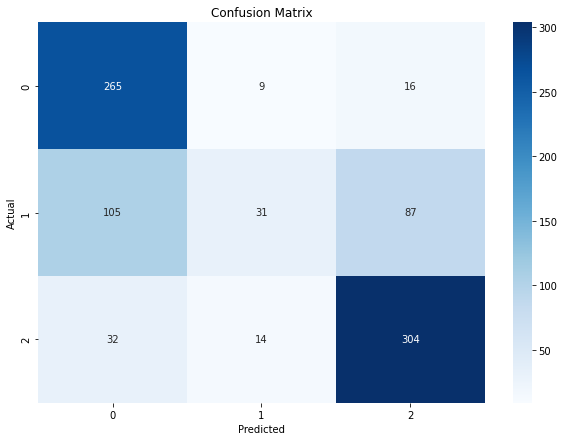

In [82]:
# Calculate the confusion matrix
cm_f = confusion_matrix(y_current, base_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_f, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

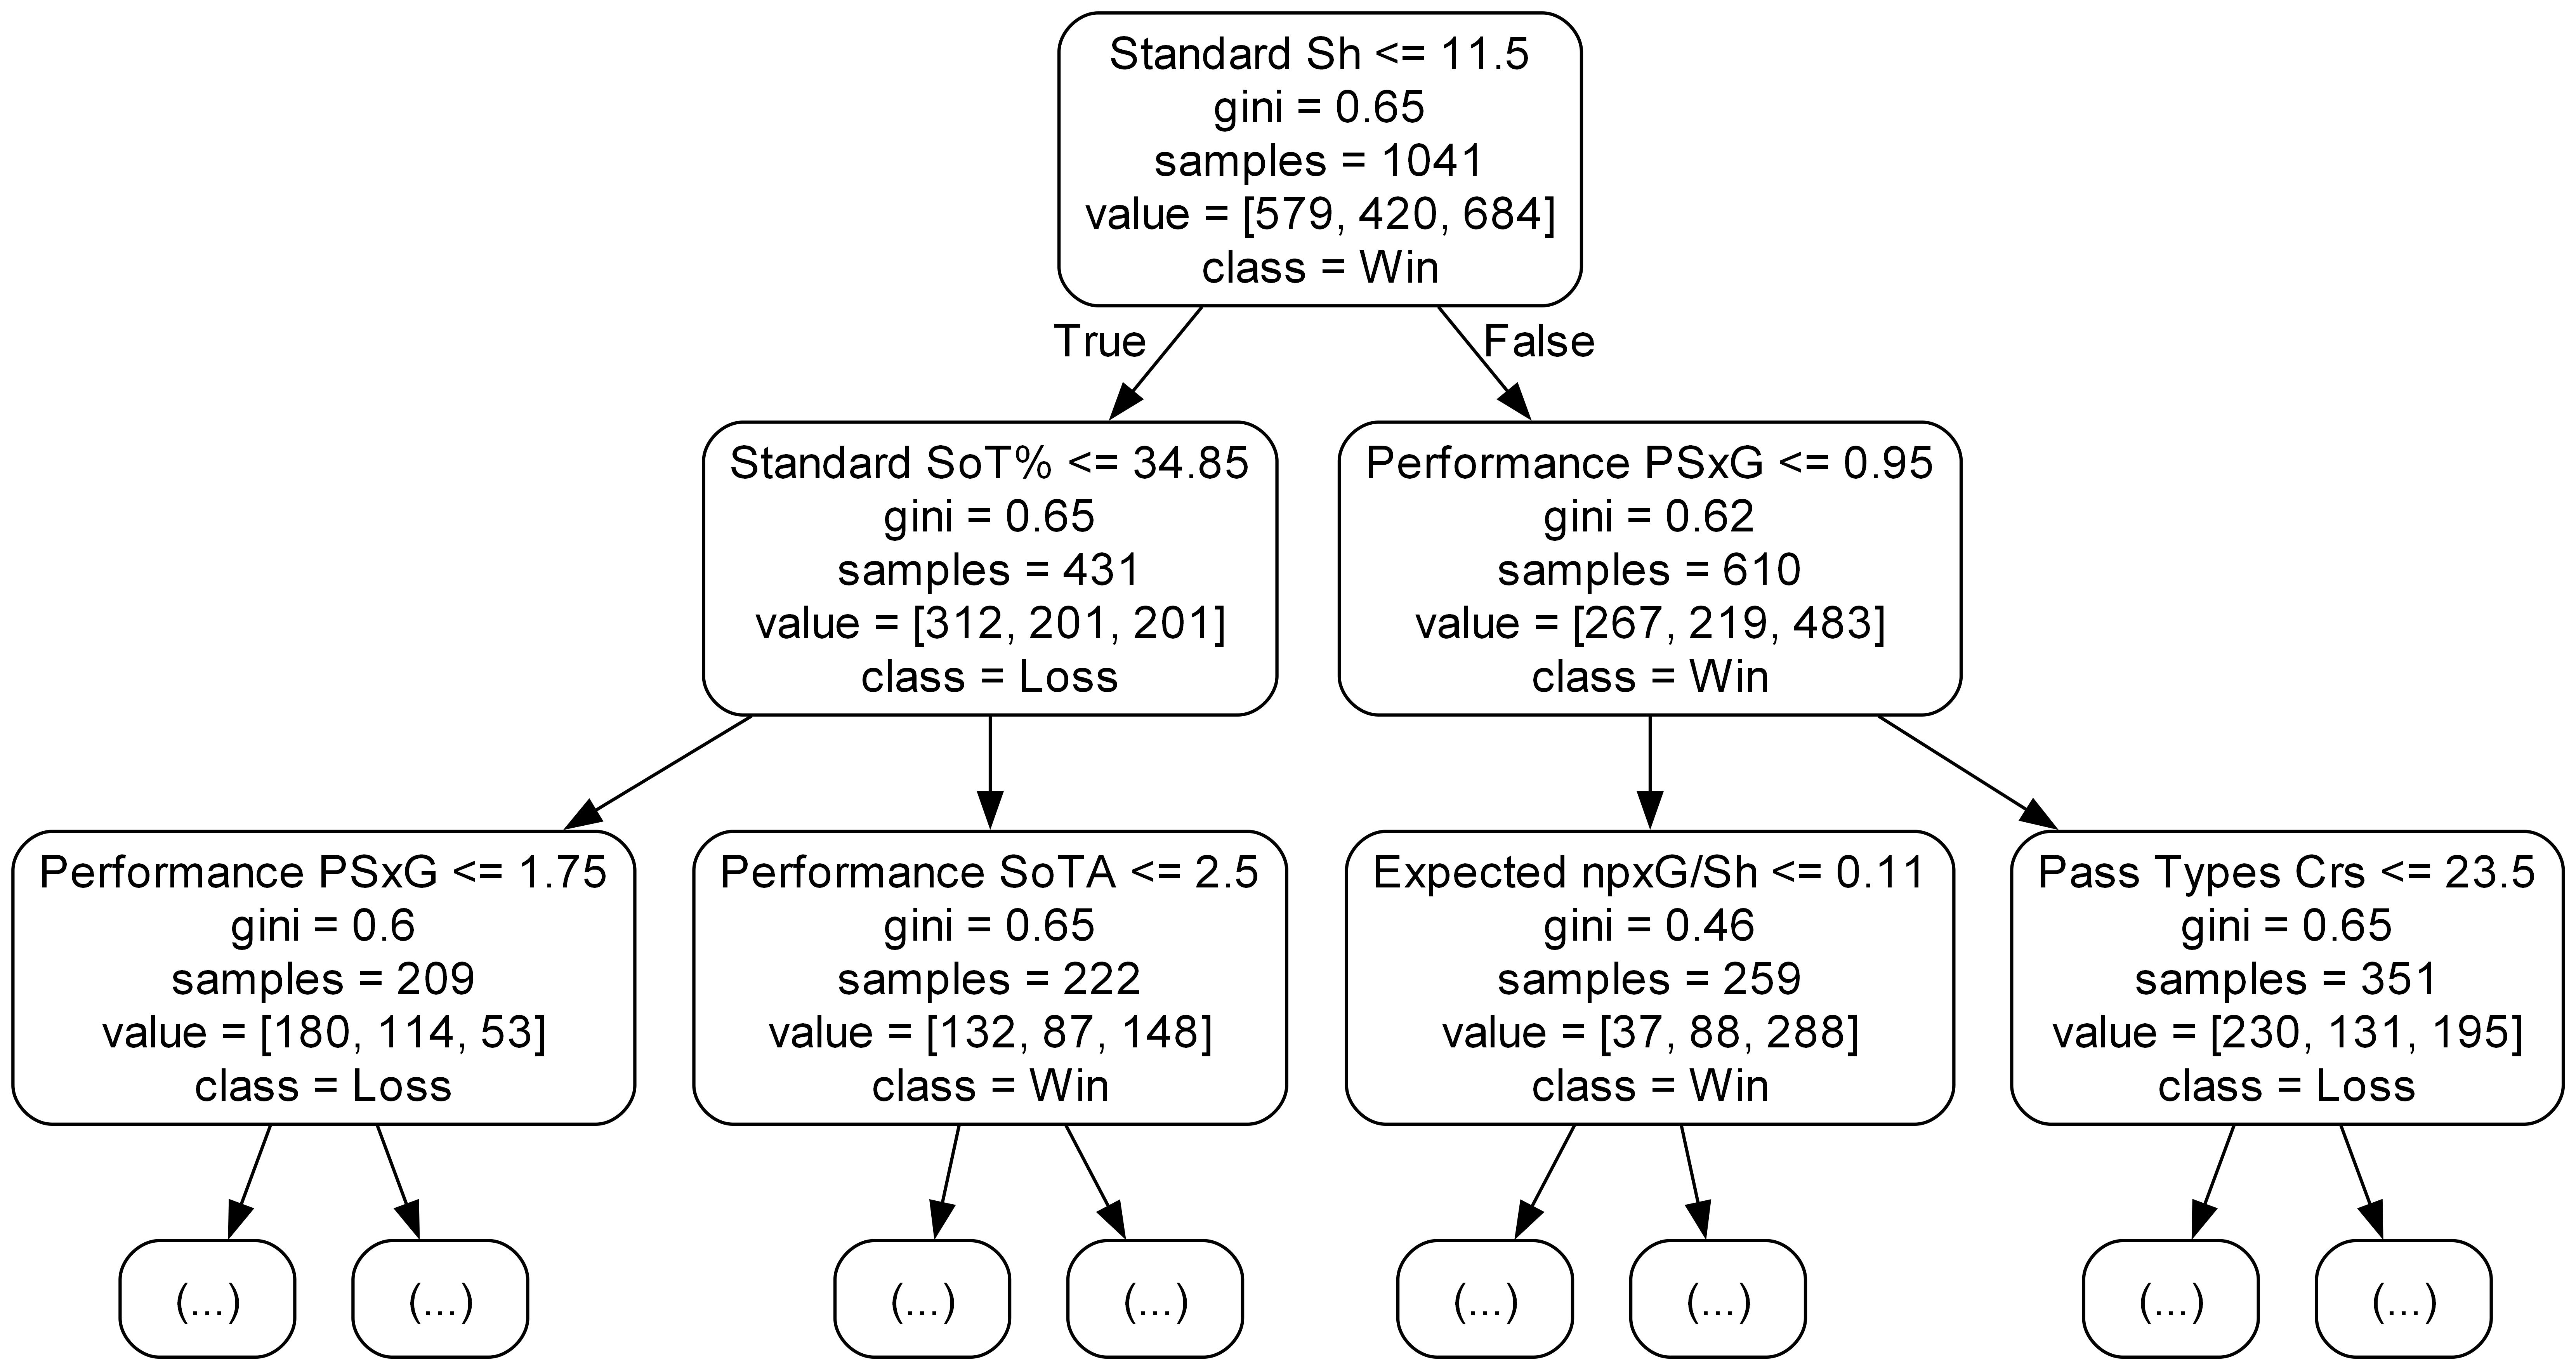

In [141]:
estimator = base_model.estimators_[0]

export_graphviz(estimator, 
                out_file='tree.dot', 
                class_names=['Loss', 'Draw', 'Win'],
                max_depth=2,
                feature_names=X.columns,
                proportion=False, 
                precision=2, 
                rounded=True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename='tree.png')

In [144]:
print("Max depth: ", estimator.tree_.max_depth)
print("Node Count: ", estimator.tree_.node_count)

Max depth:  17
Node Count:  525


### Evaluation of the default model with feature selection

In [98]:
# Make predictions on the current season data
rfe_predictions = rfe_pipeline.named_steps['m'].predict(X_current_selected_rfe)

print(classification_report(y_current, rfe_predictions, target_names=["Loss", "Draw", "Win"]))

              precision    recall  f1-score   support

        Loss       0.71      0.87      0.78       290
        Draw       0.52      0.37      0.43       223
         Win       0.79      0.78      0.78       350

    accuracy                           0.70       863
   macro avg       0.67      0.67      0.67       863
weighted avg       0.69      0.70      0.69       863



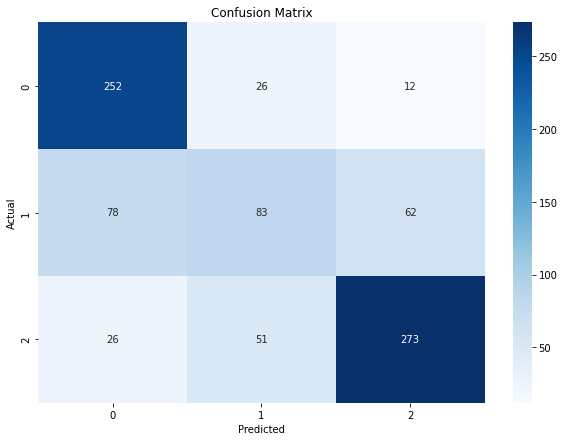

In [87]:
# Calculate the confusion matrix
cm_s = confusion_matrix(y_current, rfe_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_s, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

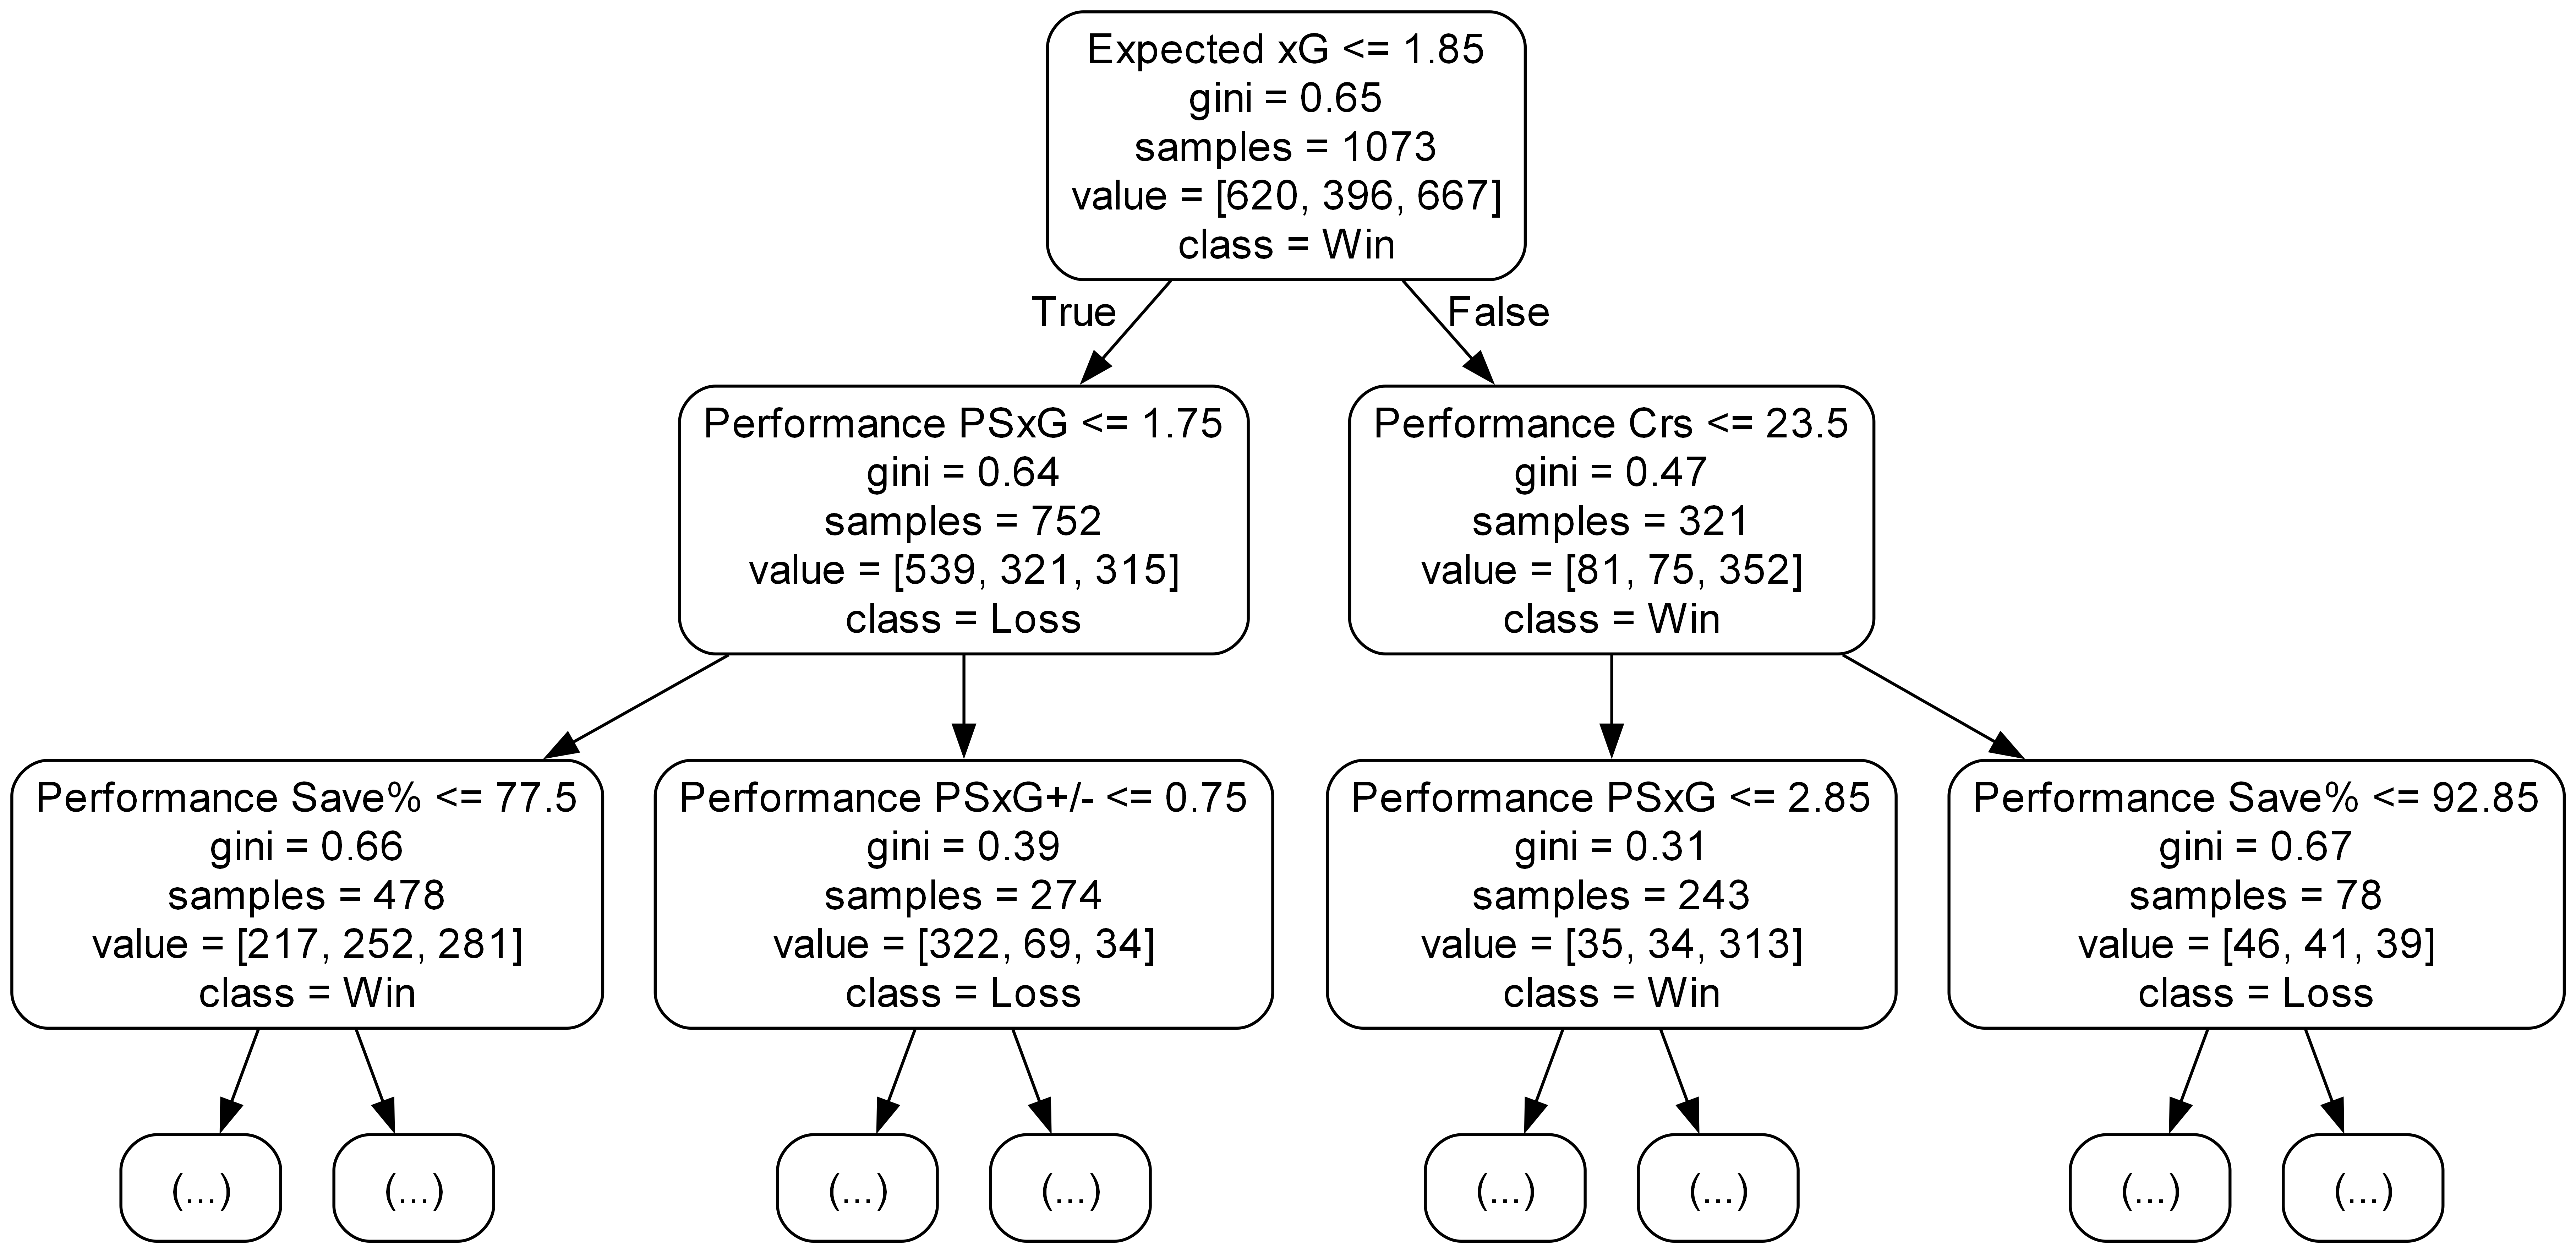

In [132]:
estimator = rfe_pipeline.named_steps['m'].estimators_[0]

export_graphviz(estimator, 
                out_file='tree.dot', 
                class_names=['Loss', 'Draw', 'Win'],
                max_depth=2,
                feature_names=X.columns[rfe_pipeline.named_steps['s'].support_],
                proportion=False, 
                precision=2, 
                rounded=True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename='tree.png')

In [133]:
print("Max depth: ", estimator.tree_.max_depth)
print("Node Count: ", estimator.tree_.node_count)

Max depth:  19
Node Count:  641


## Comparing the performance metrics after hyperparameter tuning

In [106]:
# Make predictions on the current season data using the best estimator
hyper_predictions = grid.best_estimator_.named_steps['m'].predict(X_current_selected_grid)
hyper_proba = grid.best_estimator_.named_steps['m'].predict_proba(X_current_selected_grid)

print(classification_report(y_current, hyper_predictions, target_names=["Loss", "Draw", "Win"]))

              precision    recall  f1-score   support

        Loss       0.70      0.88      0.78       290
        Draw       0.51      0.32      0.40       223
         Win       0.77      0.79      0.78       350

    accuracy                           0.70       863
   macro avg       0.66      0.66      0.65       863
weighted avg       0.68      0.70      0.68       863



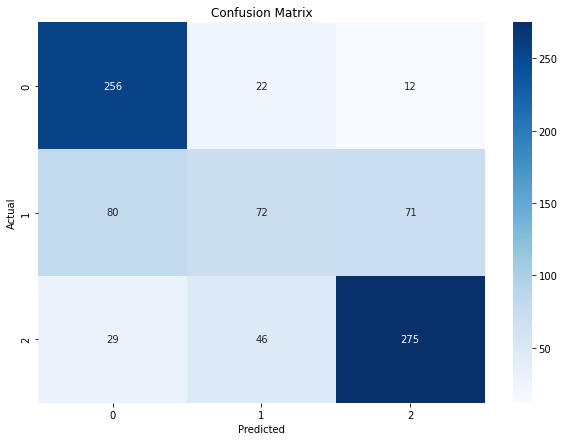

In [146]:
# Calculate the confusion matrix
cm_h = confusion_matrix(y_current, hyper_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_h, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Feature importances

In [91]:
selected_features = grid.best_estimator_.named_steps['s'].support_

# Getting the feature importances from the RandomForestClassifier
feature_importances = grid.best_estimator_.named_steps['m'].feature_importances_

feature_names = X.columns[selected_features]

# Creating a DataFrame to display feature importances

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Displaying the feature importances
importance_df.reset_index(drop=True, inplace=True)
importance_df

,Feature,Importance
0,Performance PSxG,0.179016
1,Performance Save%,0.175497
2,Expected xG,0.135553
3,Performance PSxG+/-,0.116842
4,Standard SoT%,0.105394
5,Expected npxG,0.080260
6,Performance Crs,0.076662
7,Goal Kicks AvgLen,0.067994
8,Long Cmp%,0.062783


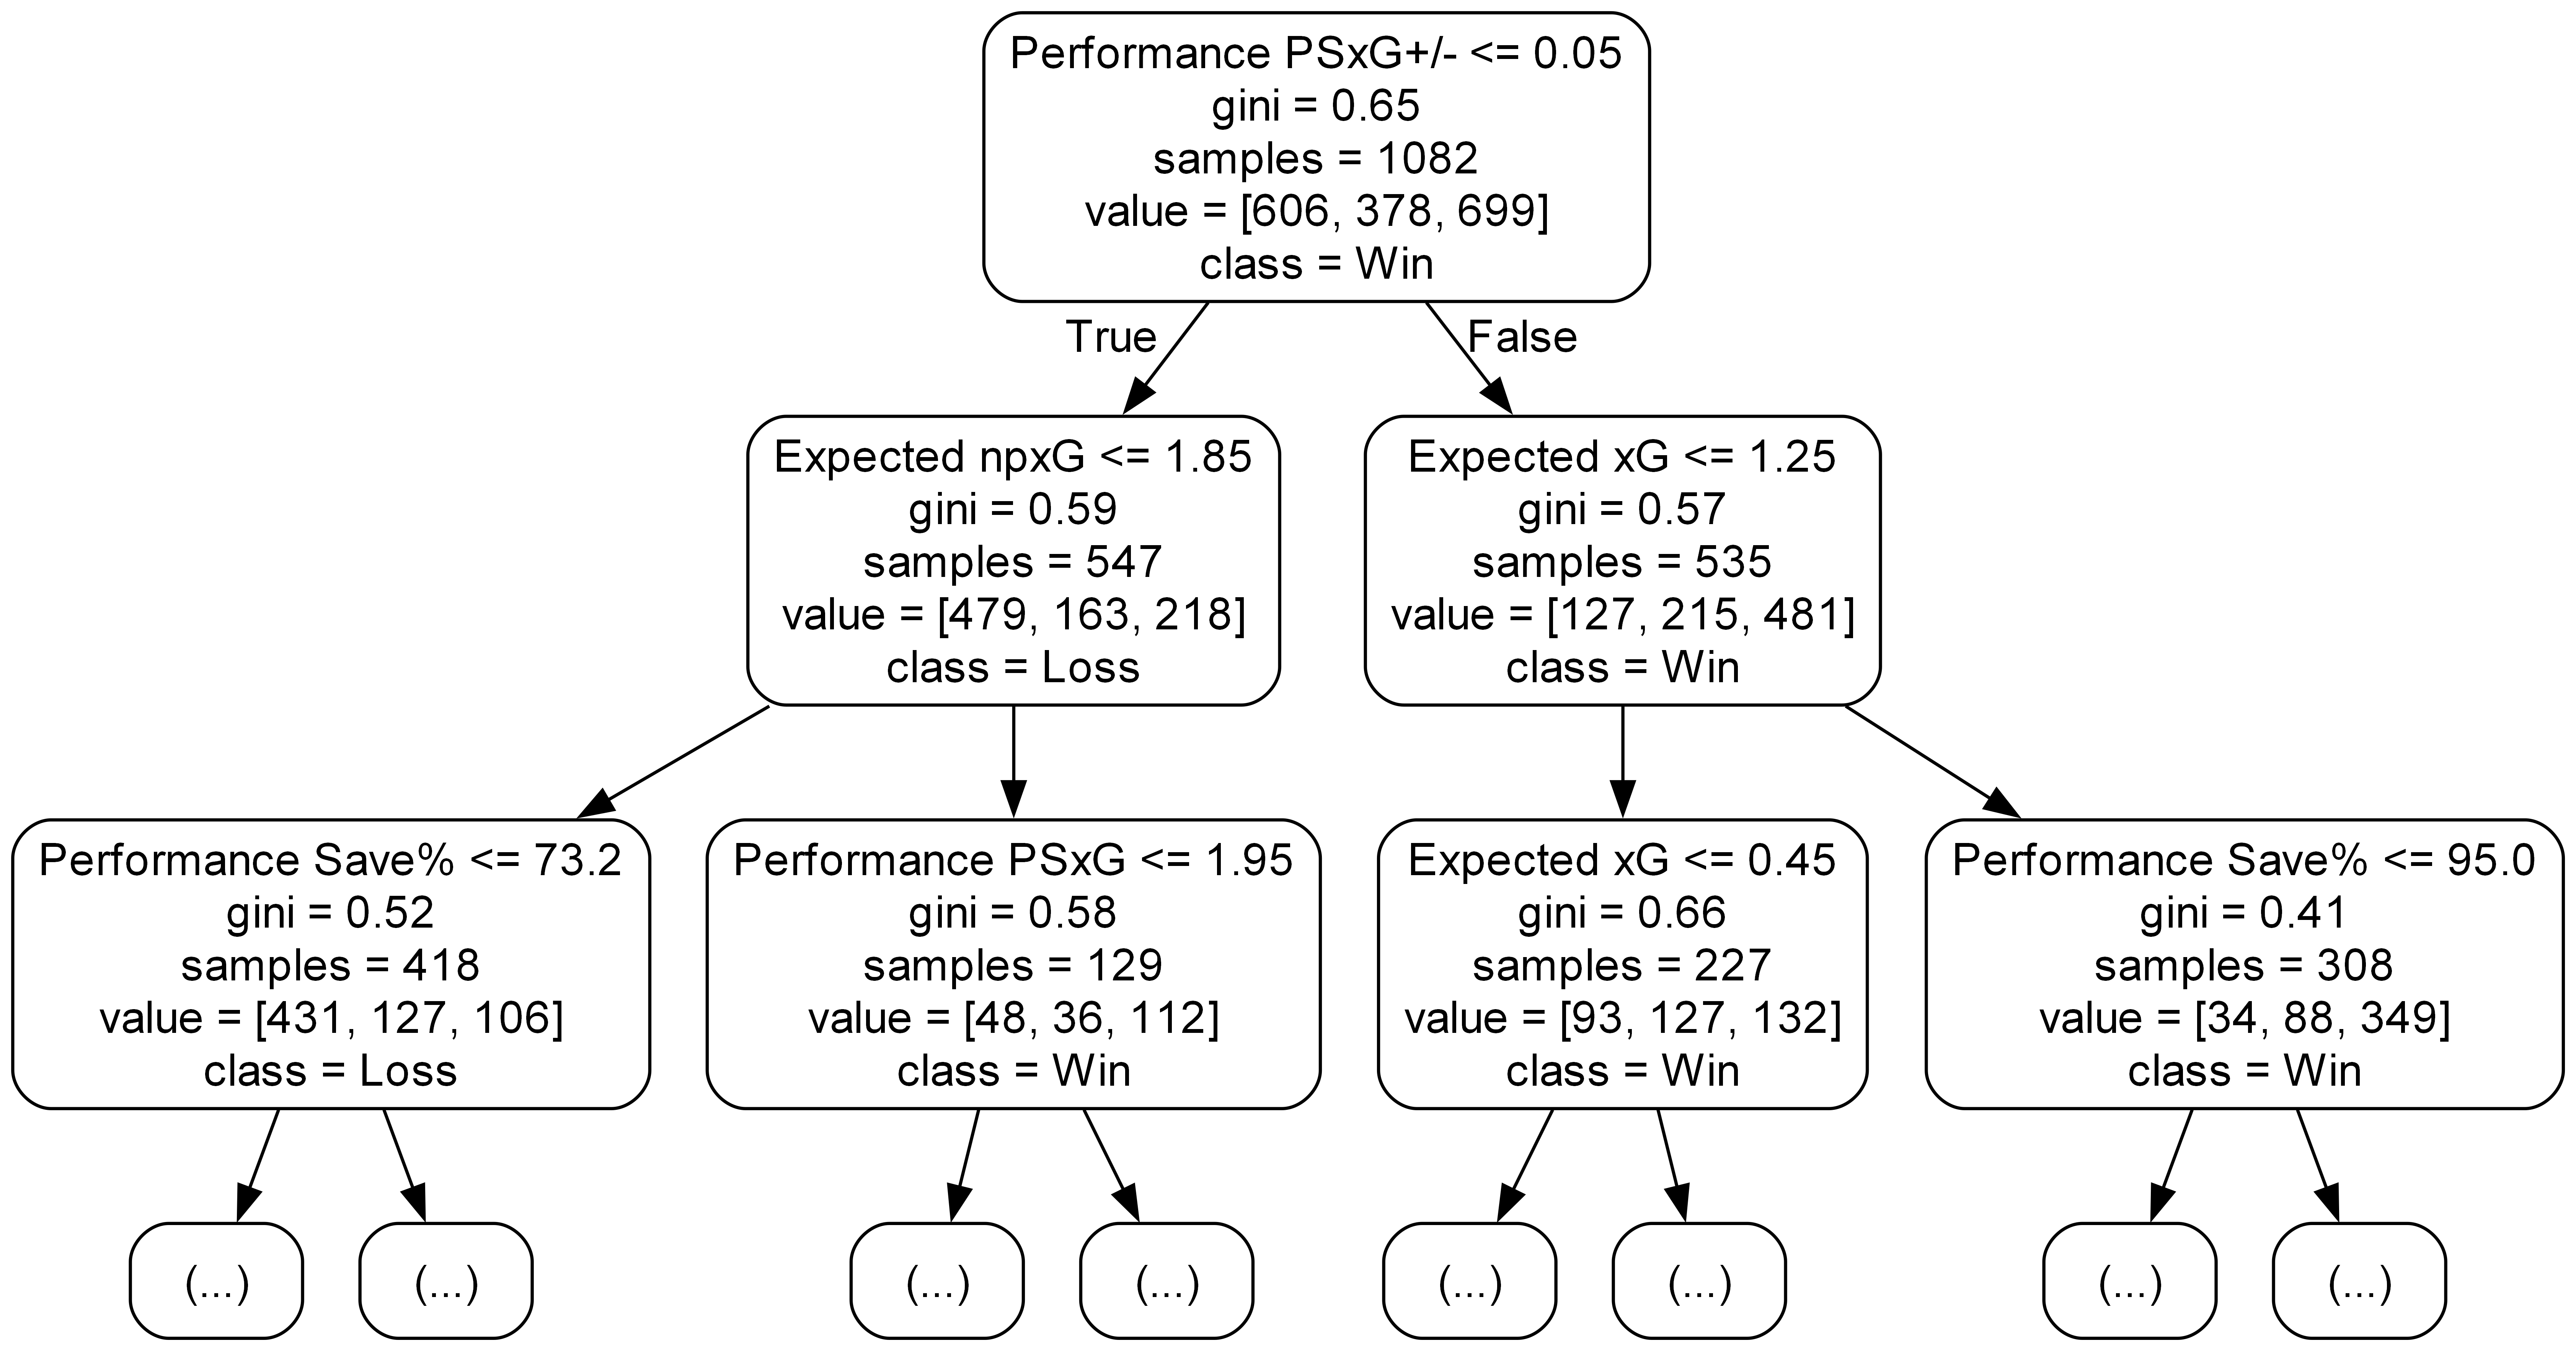

In [140]:
estimator = grid.best_estimator_.named_steps['m'].estimators_[0]

export_graphviz(estimator, 
                out_file='tree.dot', 
                class_names=['Loss', 'Draw', 'Win'],
                max_depth=2,
                feature_names=X.columns[grid.best_estimator_.named_steps['s'].support_],
                proportion=False, 
                precision=2, 
                rounded=True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename='tree.png')

In [139]:
print("Max depth: ", estimator.tree_.max_depth)
print("Node Count: ", estimator.tree_.node_count)

Max depth:  18
Node Count:  317


## ROC Curve

In [133]:
def calculate_tpr_fpr(y_real, y_pred):
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [113]:
def get_all_roc_coordinates(y_real, y_proba):
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [165]:
def plot_roc_curve(tpr, fpr, scatter=True, ax=None):
    if ax == None:
        plt.figure(figsize=(5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x=fpr, y=tpr, ax=ax)
    sns.lineplot(x=fpr, y=tpr, ax=ax) # color='black'
    sns.lineplot(x=[0, 1], y=[0, 1], color='green', ax=ax, linestyle='--')
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

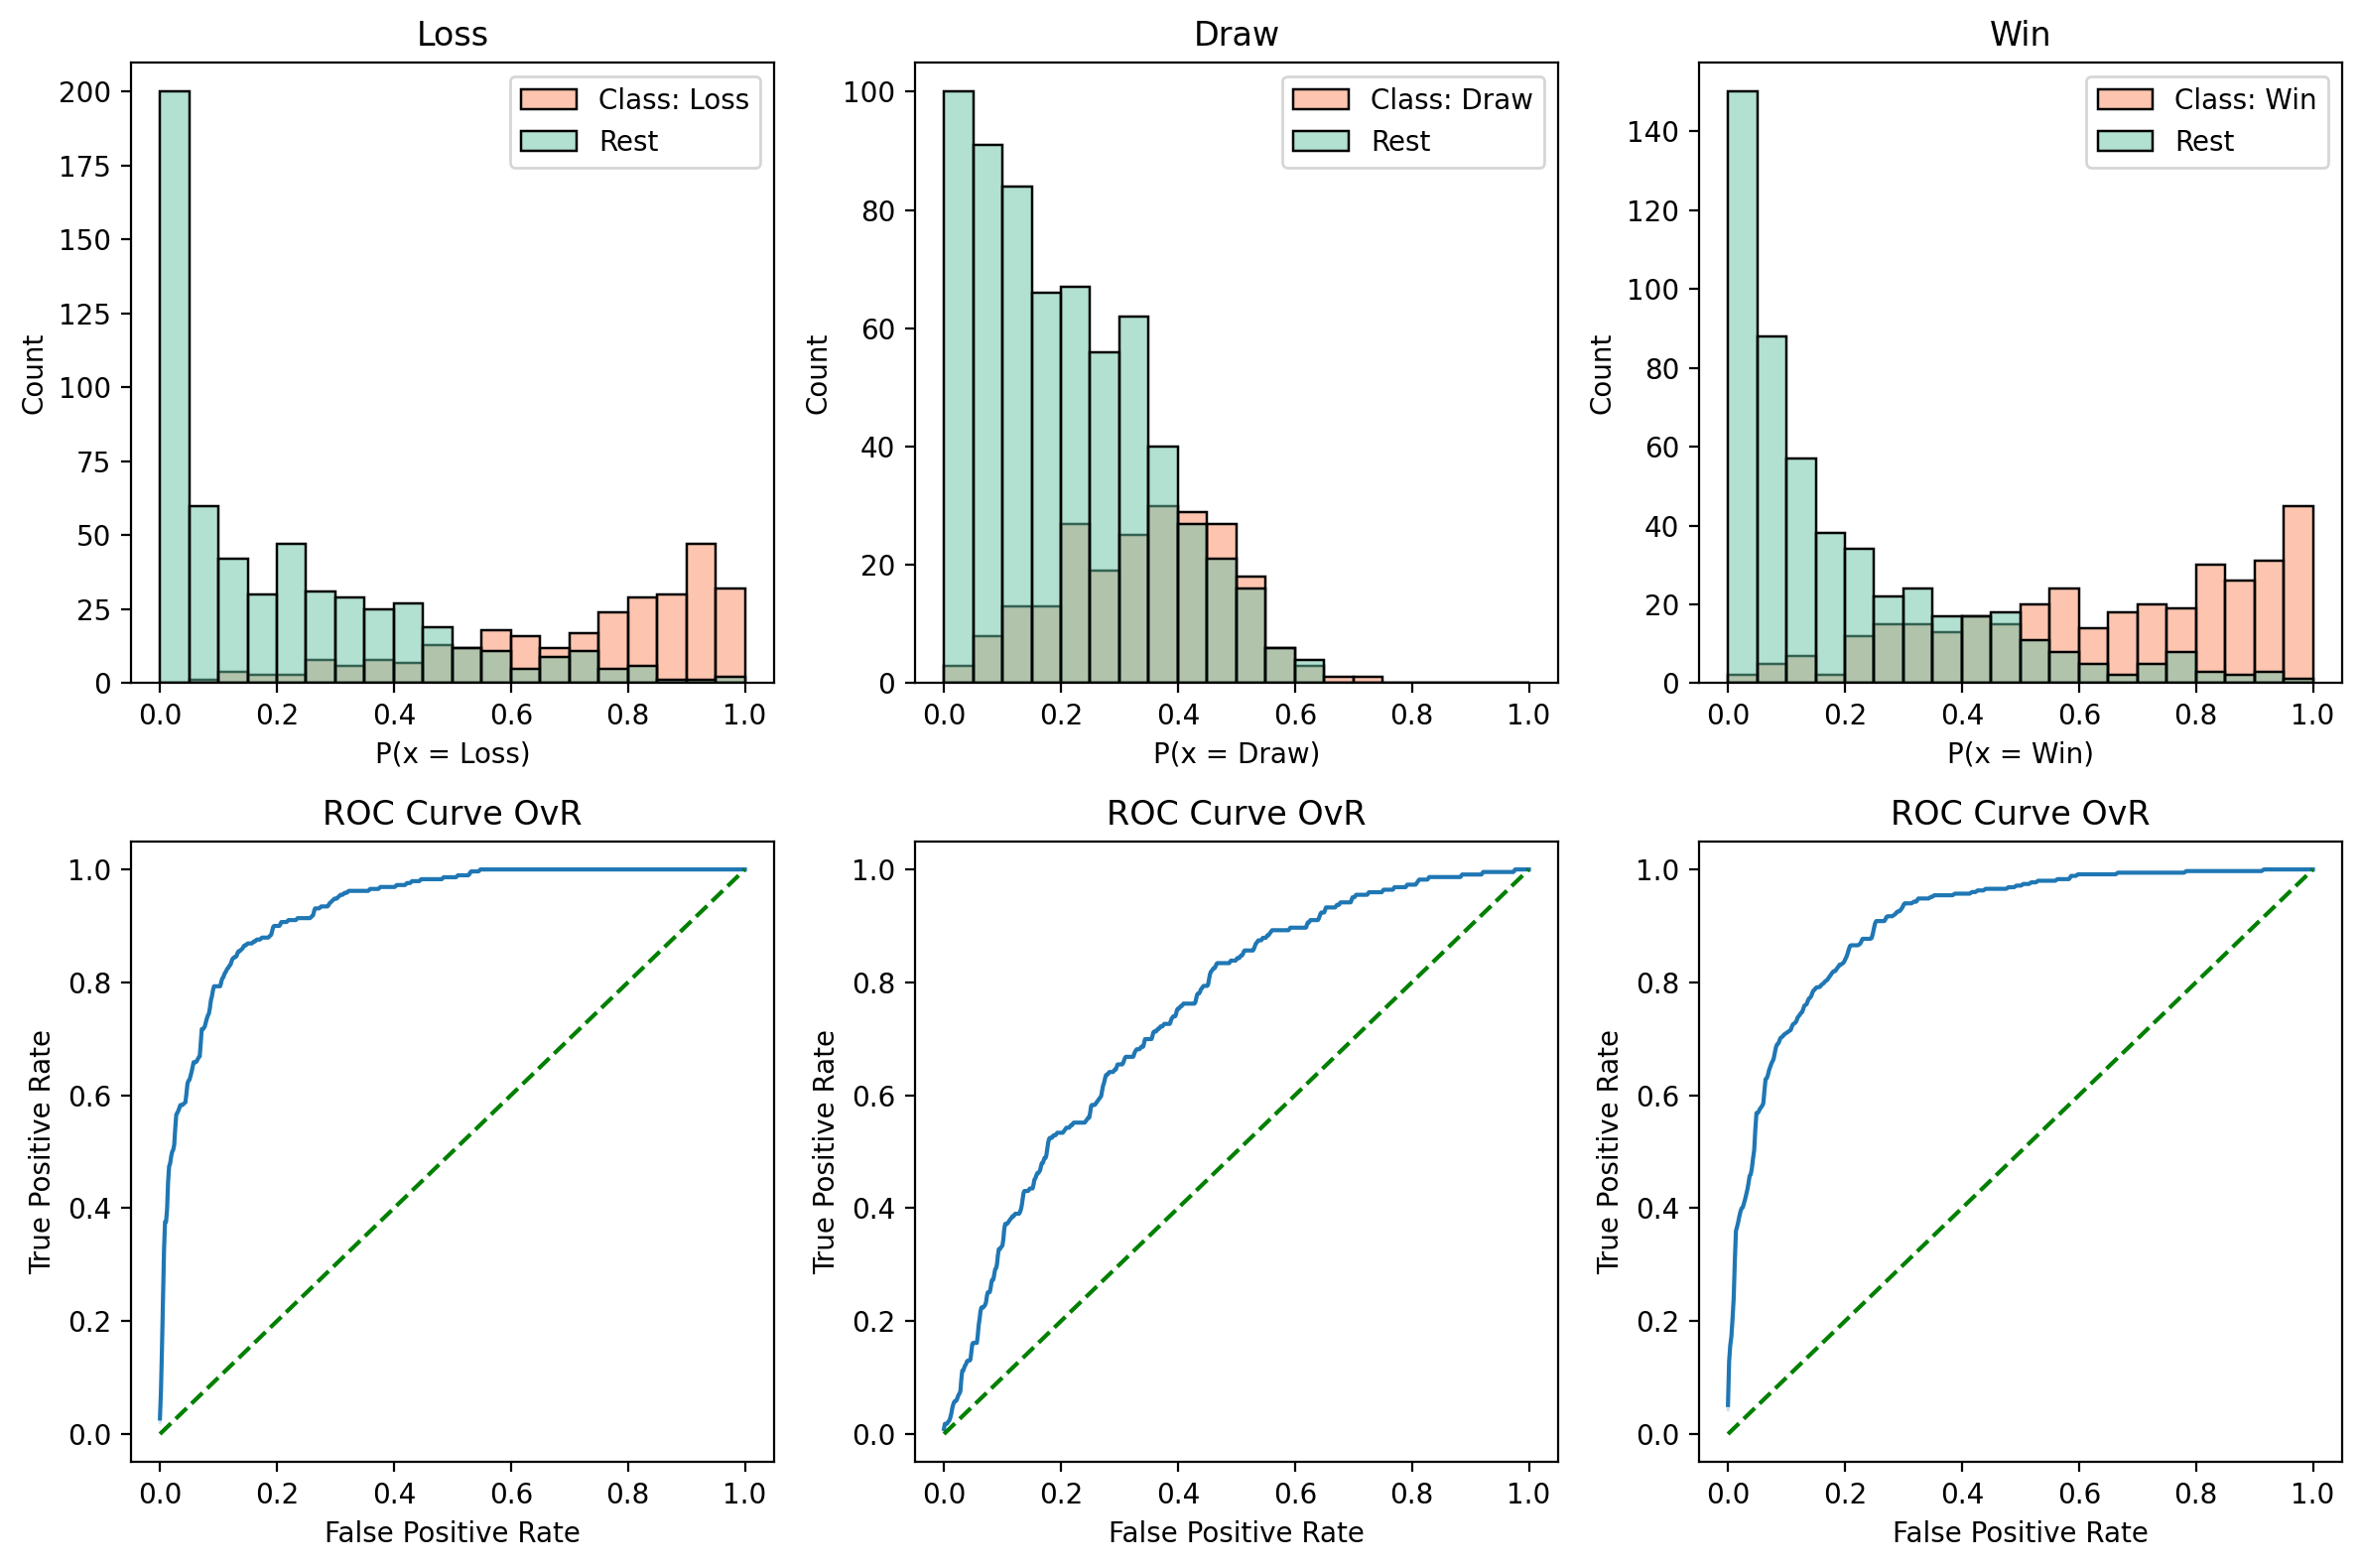

In [177]:
# Plots the Probability Distributions and the ROC Curves One vs Rest

X_current_selected_grid = pd.DataFrame(X_current_selected_grid)

plt.figure(figsize = (12, 8), dpi=200)
bins = [i/20 for i in range(20)] + [1]
classes = ["Loss", "Draw", "Win"] # grid.best_estimator_.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_current_selected_grid.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_current.map({0: 'Loss', 1: 'Draw', 2: 'Win'})]
    df_aux['prob'] = hyper_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x="prob", data=df_aux, hue='class', ax=ax, bins=bins, multiple='layer', palette='Set2', alpha=0.5)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

## Precision-recall curve

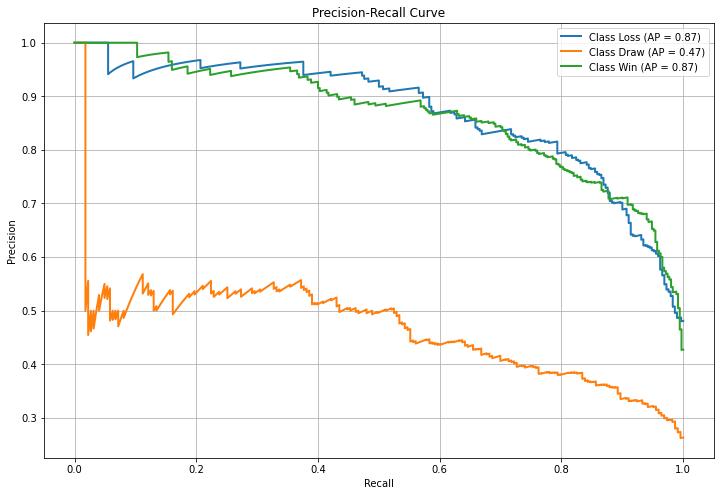

In [183]:
classes = ["Loss", "Draw", "Win"]
y_current_binarized = label_binarize(y_current, classes=np.unique(y_current))

# Precision-Recall curve and average precision score for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_current_binarized[:, i], hyper_proba[:, i])
    average_precision[i] = average_precision_score(y_current_binarized[:, i], hyper_proba[:, i])

# Plot the Precision-Recall curve for each class
plt.figure(figsize=(12, 8))
for i in range(len(classes)):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (AP = {average_precision[i]:0.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()